<div style="text-align: left;">
<table style="width:100%; background-color:transparent;">
  <tr style="background-color:transparent;">
    <td style="background-color:transparent;"><a href="http://www.datascience-paris-saclay.fr">
<img border="0" src="http://project.inria.fr/saclaycds/files/2017/02/logoUPSayPlusCDS_990.png" width="90%">
  </tr>
</table> 
</div>

<center><h1>Notre beau projet</h1></center>
<br/>
<center>Pierre Eustache, Simon Free, Timothé Krauth, Fanny Streiff, Nicolas Urien</center>

## Table of Contents

0. [Introduction](#Introduction)
1. [Data](#Data)
2. [Score Metric](#Score-metric)
3. [Data exploration](#Data-exploration)

## To Do

- target : pays par année
#### Fanny
- finir présentation des datas
- rajouter du blabla en introduction/aim
#### Nicolas
- data vis pour quelques data set
    - carte avec les pays qui ont beaucoup d'immigrés (sur la dernière année) => heat map pour les inflows
    - carte avec les pays qui employent beaucoup à l'étranger (sur la dernière année)
    - autres cartes possibles    
-    
#### P2
- series temporelles de l'immigration par pays (des plus intéressants)
- faire pareil avec certaines variables qui pourraient intéresssant (taxes qui ont augmenté ou diminué)
- heat map permet d'avoir une vision à un temp fixé, séries temporalles permet de voir la corrélation entre plusieurs variables    
#### P3
- définir une métrique : mlse
#### P4
- merge 2/3 data base (en fonction de ce que nous dit les cartes)
- préparer un premier jet
#### Pierre
- faire marcher ça sur ramp
    - une classe régressor
    - une classe extractor

# Introduction

The predictive aim of this challenge is to use several datasets to predict the number of immigrant for each OCDE's country per year. Au cours de ces 30 dernières années, le nombre des migrants internationaux a doublé dans le monde que cela soit pour des raisons économiques, écologique ou *de guerre*. Les courants de migration placent les gouvernements de tous les États devant de sérieux problèmes de gestion et d’intégration. Il serait donc plus qu'intéressant de pouvoir prédire les flux migratoires des années à venir afin d'assurer à tous des bonnes conditions d'accueil.


There are seven datasets in this challenge:

* `Employment rate.csv` 
* `Governement Debt.csv` 
* `Greenhouse Gases.csv` 
* `Inflows.csv` 
* `Health.csv` 
* `Population.csv` 
* `Taxes.csv` 

# Data

- **Employement rate**
    - **Country**
    - **Place of Birth**
    - **Gender**
    - **Rate**
    - **Year**
    - **Unit**
    - **Power Code**
    - **Reference Period**
    - **Value**
    - **Flags**
<br/><br/>
- **Governement Debt**
    - **Country**
    - **Time**
    - **Frequency**
    - **Unit**
    - **Variable**
    - **Time Period**
    - **Value**
    - **Flags**
<br/><br/>   
- **Greenhouse Gases**
    - **Country**
    - **Pollutant**
    - **Variable**
    - **Year**
    - **Unit**
    - **Power Code**
    - **Reference Period**
    - **Value**
    - **Flags**
<br/><br/>    
- **Health**
    - **Financing scheme**
    - **Function**
    - **Provider**
    - **Measure**
    - **Country**
    - **Year**
    - **Unit**
    - **Power Code**
    - **Reference Period**
    - **Values**
    - **Flags**
<br/><br/>    
- **Inflows**
    - **Country**
    - **Place of Birth**
    - **Gender**
    - **Rate**
    - **Year**
    - **Unit**
    - **Power Code**
    - **Reference Period**
    - **Values**
    - **Flags**
<br/><br/>    
- **Population**
    - **Country**
    - **Sex**
    - **Age**
    - **Time**
    - **Values**
    - **Flags**
<br/><br/>    
- **Taxes**
    - **Country**
    - **Family Type**
    - **Main out-of-work benefit**
    - **Unemployment duration**
    - **Earning in the new job**
    - **Include housing benefits**
    - **Include temporary into-work benefits**
    - **Year**
    - **Values**
    - **Flags**

# Score metric

# Data exploration

In [1]:
%matplotlib inline
import imp
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
Erates = pd.read_csv('data/Employment rate.csv')
drop_cols = ['COUNTRY','BIRTH', 'GENDER', 'RATE', 'YEAR', 'Unit Code', 'PowerCode Code', 'Reference Period Code', 'Flag Codes']
Erates = Erates.drop(drop_cols,axis=1)
Gdebt = pd.read_csv('data/Governement Debt.csv')
drop_cols = ['COU','DTYP', 'FREQ', 'UNIT', 'DVAR', 'TIME', 'Flag Codes']
Gdebt = Gdebt.drop(drop_cols,axis=1)
Ggases = pd.read_csv('data/Greenhouse Gases.csv')
drop_cols = ['COU','POL', 'VAR', 'YEA', 'Unit Code', 'PowerCode Code', 'Reference Period Code', 'Flag Codes']
Ggases = Ggases.drop(drop_cols,axis=1)
health = pd.read_csv('data/Health.csv')
drop_cols = ['HF','HC', 'HP', 'MEASURE', 'LOCATION', 'Unit Code', 'TIME','PowerCode Code', 'Reference Period Code', 'Flag Codes']
health = health.drop(drop_cols,axis=1)
inflows = pd.read_csv('data/Inflows.csv')
drop_cols = ['CO2','VAR', 'GEN', 'COU', 'YEA', 'Flag Codes']
inflows = inflows.drop(drop_cols,axis=1)
population = pd.read_csv('data/Population.csv')
drop_cols = ['LOCATION','AGE', 'SEX', 'TIME', 'Flag Codes']
population = population.drop(drop_cols,axis=1)
taxes = pd.read_csv('data/Taxes.csv')
drop_cols = ['LOCATION','FAMILY', 'UBMAINBEN', 'DURATION', 'EARNINGS', 'HBTOPUPS', 'INTOWBEN', 'TIME', 'Flag Codes']
taxes = taxes.drop(drop_cols,axis=1)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
Erates.head(3)

,Country,Place of birth,Gender,Rate,Year,Unit,PowerCode,Reference Period,Value,Flags
0,Australia,Foreign-born,Men,Employment rate,2000,Percentage,Units,NaN,74.0,NaN
1,Australia,Foreign-born,Men,Employment rate,2001,Percentage,Units,NaN,73.9,NaN
2,Australia,Foreign-born,Men,Employment rate,2002,Percentage,Units,NaN,74.0,NaN


In [4]:
Gdebt.head(3)

,Country,Type,Frequency,Unit,Variable,Time period,Value,Flags
0,Australia,Stocks: Outstanding amounts,Annual,Million USD,Total central government debt,2000,46472.311,NaN
1,Australia,Stocks: Outstanding amounts,Annual,Million USD,Total central government debt,2001,35119.508,NaN
2,Australia,Stocks: Outstanding amounts,Annual,Million USD,Total central government debt,2002,37785.120,NaN


In [5]:
Ggases.head(3)

,Country,Pollutant,Variable,Year,Unit,PowerCode,Reference Period,Value,Flags
0,Australia,Greenhouse gases,Total emissions excluding LULUCF,1990,Tonnes of CO2 equivalent,Thousands,NaN,420315.323,NaN
1,Australia,Greenhouse gases,Total emissions excluding LULUCF,1991,Tonnes of CO2 equivalent,Thousands,NaN,421381.463,NaN
2,Australia,Greenhouse gases,Total emissions excluding LULUCF,1992,Tonnes of CO2 equivalent,Thousands,NaN,425702.483,NaN


In [6]:
health.head(3)

,Financing scheme,Function,Provider,Measure,Country,Year,Unit,PowerCode,Reference Period,Value,Flags
0,All financing schemes,Current expenditure on health (all functions),All providers,Share of gross domestic product,Denmark,2010,Percentage,Units,NaN,10.333,Break
1,All financing schemes,Current expenditure on health (all functions),All providers,Share of gross domestic product,Denmark,2011,Percentage,Units,NaN,10.153,NaN
2,All financing schemes,Current expenditure on health (all functions),All providers,Share of gross domestic product,Denmark,2012,Percentage,Units,NaN,10.241,NaN


In [7]:
inflows.head(3)

,Country of birth/nationality,Variable,Gender,Country,Year,Value,Flags
0,Afghanistan,Inflows of foreign population by nationality,Total,Australia,2000,887.0,NaN
1,Afghanistan,Inflows of foreign population by nationality,Total,Australia,2001,456.0,NaN
2,Afghanistan,Inflows of foreign population by nationality,Total,Australia,2002,660.0,NaN


In [8]:
population.head(3)

,Country,Sex,Age,Time,Value,Flags
0,Australia,Women,Total,2005,10157211.0,NaN
1,Australia,Women,Total,2006,10291542.0,NaN
2,Australia,Women,Total,2007,10473986.0,NaN


In [9]:
taxes.head(3)

,Country,Family type,Main out-of-work benefit,Unemployment duration (months),Earnings in the new job,Include housing benefits,Include temporary into-work benefits,Year,Value,Flags
0,Belgium,Single person without children,Guaranteed Minimum Income (GMI) benefits,2,Minimum Wage,Yes,Yes,2001,67,NaN
1,Belgium,Single person without children,Guaranteed Minimum Income (GMI) benefits,2,Minimum Wage,Yes,Yes,2002,68,NaN
2,Belgium,Single person without children,Guaranteed Minimum Income (GMI) benefits,2,Minimum Wage,Yes,Yes,2003,66,NaN


In [10]:
print('Erates.shape:',Erates.shape)
print('Gdebt.shape:',Gdebt.shape)
print('Ggases.shape:',Ggases.shape)
print('health.shape:',health.shape)
print('inflows.shape:',inflows.shape)
print('population.shape:',population.shape)
print('taxes.shape:',taxes.shape)

Erates.shape: (10284, 10)
Gdebt.shape: (43392, 8)
Ggases.shape: (51614, 9)
health.shape: (33815, 11)
inflows.shape: (458192, 7)
population.shape: (68208, 6)
taxes.shape: (474112, 10)


In [11]:
Erates.dtypes

Country              object
Place of birth       object
Gender               object
Rate                 object
Year                  int64
Unit                 object
PowerCode            object
Reference Period    float64
Value               float64
Flags               float64
dtype: object

In [12]:
Erates.describe()

,Year,Reference Period,Value,Flags
count,10284.000000,0.0,10284.000000,0.0
mean,2009.327013,NaN,49.212845,NaN
std,5.396099,NaN,29.895091,NaN
min,2000.000000,NaN,0.000000,NaN
25%,2005.000000,NaN,11.075000,NaN
50%,2009.000000,NaN,62.800000,NaN
75%,2014.000000,NaN,73.700000,NaN
max,2018.000000,NaN,94.100000,NaN


In [13]:
Erates.nunique()

Country              35
Place of birth        2
Gender                3
Rate                  3
Year                 19
Unit                  1
PowerCode             1
Reference Period      0
Value               828
Flags                 0
dtype: int64

# Analyse de la variable d'intérêt

On a choisi de prévoir le nombre d'immigrants arrivant dans un pays par année. Ainsi, une observation par exembple,est le flux d'immigrant en Australie, pour l'année 2020, quelle que soit son originie. 

In [13]:
#différents types de variables
#on s'occupe uniquement de la variable 'Inflows of foreign population by nationality'
inflows.Variable.unique()

array(['Inflows of foreign population by nationality',
       'Outflows of foreign population by nationality',
       'Stock of foreign-born population by country of birth',
       'Inflows of asylum seekers by nationality',
       'Stock of foreign population by nationality',
       'Acquisition of nationality by country of former nationality',
       'Stock of foreign-born labour by country of birth',
       'Stock of foreign labour by nationality'], dtype=object)

In [43]:
Y_inflows = inflows[inflows.Variable == 'Inflows of foreign population by nationality']

In [44]:
#Construction de la variable d'intérêt
Y_inflows = Y_inflows.groupby(['Country','Year']).agg({'Value': sum})

In [63]:
Y_inflows.unstack()

Value                                                    \
Year                  2000       2001         2002         2003         2004   
Country                                                                        
Australia         217418.0   257520.0   239048.000   247991.000   295105.000   
Austria           131907.0   149572.0   172288.000   186682.000   208492.000   
Belgium           106731.0   121853.0   129526.000   127353.000   134359.000   
Canada            454792.0   501162.0   457838.000   442726.000   471644.000   
Chile              37458.0    57828.0    59862.000    59311.000    63796.000   
Czech Republic      7787.0    21332.0    81746.000   114876.000   101597.000   
Denmark            45104.0    48828.0    42703.000    36689.000    37281.000   
Estonia                NaN        NaN          NaN          NaN     1473.000   
Finland            18220.0    22074.0    19944.000    18864.000    23022.000   
France            182904.0   213157.0   247927.000   272212.000   282506.000   
Germany          1245841.0  1300944.0  1316564.000  1203416.000  1203781.000   
Greece                 NaN        NaN          NaN          NaN          NaN   
Hungary            39315.0    39456.0    34767.000    37442.000    42894.000   
Iceland             4755.0     4870.0     3611.000     2626.000     4978.000   
Ireland            38700.0    45400.0    50000.000    53600.000    51500.000   
Israel            120269.0    86823.0    67045.000    46465.000    41695.000   
Italy             370616.0   310252.0   316577.000   843865.000   784229.000   
Japan             622845.0   632640.0   620688.000   674774.000   672531.000   
Korea             346136.0   327784.0   317871.000   337745.000   357050.000   
Latvia              2761.0        NaN          NaN          NaN          NaN   
Luxembourg         21584.0    22110.0    21976.000    25108.000    24490.000   
Mexico              6414.0     8053.0     5828.000     6945.000     8513.000   
Netherlands       181753.0   188559.0   172278.000   146128.000   129369.000   
New Zealand        74914.0   108103.0   141065.131   129936.069   110819.107   
Norway             55536.0    50711.0    61377.000    53374.000    55487.000   
Poland             30784.0    41686.0    58781.000    58881.000    71829.000   
Portugal           29722.0   289137.0   137032.000    59202.000    65579.000   
Slovak Republic     4622.0     4723.0     4784.000     9085.000    15778.000   
Slovenia               NaN        NaN          NaN          NaN          NaN   
Spain             661732.0   788076.0   886133.000   858973.000  1291606.000   
Sweden             84689.0    87950.0    95206.000    95976.000    95160.000   
Switzerland       146175.0   165137.0   169412.000   159258.000   165780.000   
Turkey                 NaN        NaN          NaN          NaN          NaN   
United Kingdom    516661.0   528852.0   484770.000   547405.000   702322.000   
United States    1681414.0  2116960.0  2118288.000  1406754.000  1915395.000   

                                                                   \
Year                    2005        2006         2007        2008   
Country                                                             
Australia         327621.000   354580.00   379703.000   408314.00   
Austria           195990.000   165798.00   183092.000   188736.00   
Belgium           144260.000   155111.00   173639.000   211897.00   
Canada            524485.000   503278.00   473503.000   494476.00   
Chile              81364.000    73920.00   105966.000    86960.00   
Czech Republic    117147.000   132247.00   205674.000   152046.00   
Denmark            40202.000    47893.00    62816.000    73937.00   
Estonia             1910.000     2934.00     3857.000     3834.00   
Finland            25488.000    27736.00    35008.000    39812.00   
France            271570.000   388052.00   359500.000   362353.00   
Germany          1158299.000  1102561.00  1133447.000  1139666.00   
Greece        

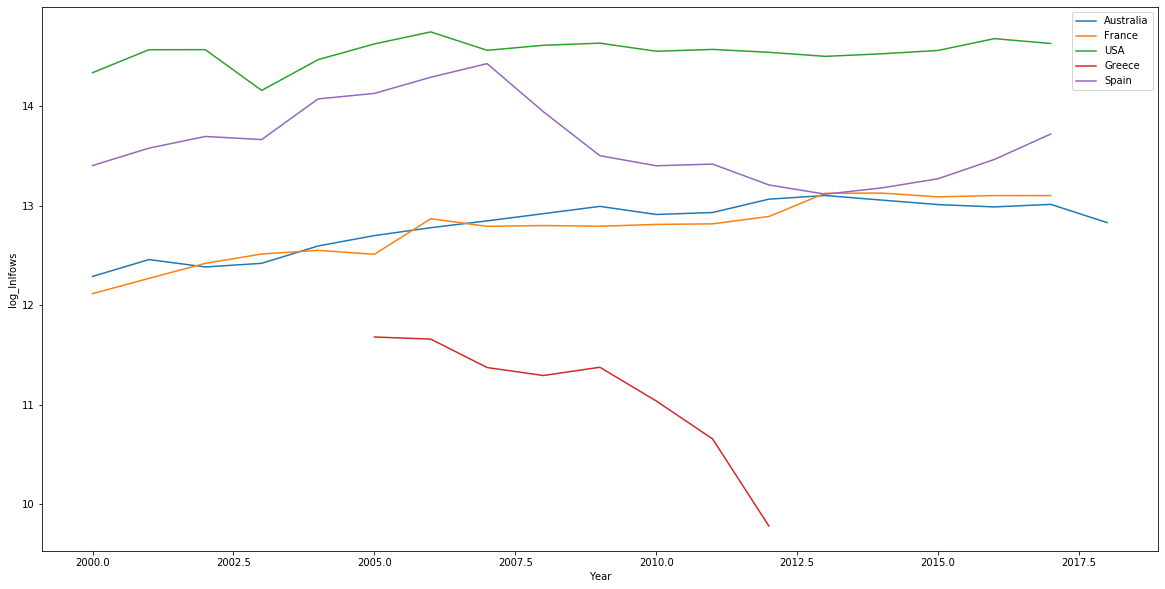

In [76]:
#Evolution des immigrations entre 2000 et 2018
plt.figure(figsize=(20,10))
plt.plot(Y_inflows.loc['Australia'].index, np.log(Y_inflows.loc['Australia'].Value))
plt.plot(Y_inflows.loc['France'].index, np.log(Y_inflows.loc['France'].Value))
plt.plot(Y_inflows.loc['United States'].index, np.log(Y_inflows.loc['United States'].Value))
plt.plot(Y_inflows.loc['Greece'].index, np.log(Y_inflows.loc['Greece'].Value))
plt.plot(Y_inflows.loc['Spain'].index, np.log(Y_inflows.loc['Spain'].Value))
plt.legend(['Australia','France', 'USA', 'Greece', 'Spain'])
plt.xlabel('Year')
plt.ylabel('log_Inlfows')
plt.show()

Generally speaking, inflows tend to increase in most of the countries. That seems relevant as globalisation has been more and more widespread over the past 20 years. Means of transportation are more efficents, as boundaries are way more open. Thus, expatriation is easier, and people are more keen to take the risk. Nevertheless, some countries display a negative evolution of their inflows. That's the case of Greece and Spain. Those countries are very useful as they could help us to determine the variables that influence most immigration.

We can try to plot the time series of Employment rate and Governement debt, and see if there is any obvious correlation beetween those variables and inflows

### Employment Rate 

In [84]:
Erates.head()

,Country,Place of birth,Gender,Rate,Year,Unit,PowerCode,Reference Period,Value,Flags
0,Australia,Foreign-born,Men,Employment rate,2000,Percentage,Units,NaN,74.0,NaN
1,Australia,Foreign-born,Men,Employment rate,2001,Percentage,Units,NaN,73.9,NaN
2,Australia,Foreign-born,Men,Employment rate,2002,Percentage,Units,NaN,74.0,NaN
3,Australia,Foreign-born,Men,Employment rate,2003,Percentage,Units,NaN,74.1,NaN
4,Australia,Foreign-born,Men,Employment rate,2004,Percentage,Units,NaN,75.6,NaN


In [87]:
Erates.Rate.unique()

array(['Employment rate', 'Unemployment rate', 'Participation rate'],
      dtype=object)

In [88]:
Erates['Place of birth'].unique()

array(['Foreign-born', 'Native-born'], dtype=object)

In [89]:
Erates.Gender.unique()

array(['Men', 'Women', 'Total'], dtype=object)

One way to analyse this is to take the unemployment rate global (men and women). We can also make the distinction between foreign born and native born. The forme could certainly have a deeper impact on the inflows than the latter. 

In [93]:
UnempRates = Erates[Erates.Rate == 'Unemployment rate']
UnempRates = UnempRates[Erates.Gender == 'Total']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [99]:
UnempRates.nunique()

Country              35
Place of birth        2
Gender                1
Rate                  1
Year                 19
Unit                  1
PowerCode             1
Reference Period      0
Value               206
Flags                 0
dtype: int64

In [107]:
UnempRates = UnempRates.set_index([UnempRates.Country,UnempRates.Year])

In [120]:
UnempRates.loc['Australia'].index.unique()

Int64Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
           dtype='int64', name='Year')

In [114]:
UnempRates.loc['Australia'][UnempRates.loc['Australia']['Place of birth']== 'Foreign-born']

,Country,Place of birth,Gender,Rate,Year,Unit,PowerCode,Reference Period,Value,Flags
Year,,,,,,,,,,
2000,Australia,Foreign-born,Total,Unemployment rate,2000,Percentage,Units,NaN,6.7,NaN
2001,Australia,Foreign-born,Total,Unemployment rate,2001,Percentage,Units,NaN,7.3,NaN
2002,Australia,Foreign-born,Total,Unemployment rate,2002,Percentage,Units,NaN,6.8,NaN
2003,Australia,Foreign-born,Total,Unemployment rate,2003,Percentage,Units,NaN,6.4,NaN
2004,Australia,Foreign-born,Total,Unemployment rate,2004,Percentage,Units,NaN,5.5,NaN
2005,Australia,Foreign-born,Total,Unemployment rate,2005,Percentage,Units,NaN,5.3,NaN
2006,Australia,Foreign-born,Total,Unemployment rate,2006,Percentage,Units,NaN,5.1,NaN
2007,Australia,Foreign-born,Total,Unemployment rate,2007,Percentage,Units,NaN,4.9,NaN
2008,Australia,Foreign-born,Total,Unemployment rate,2008,Percentage,Units,NaN,4.6,NaN


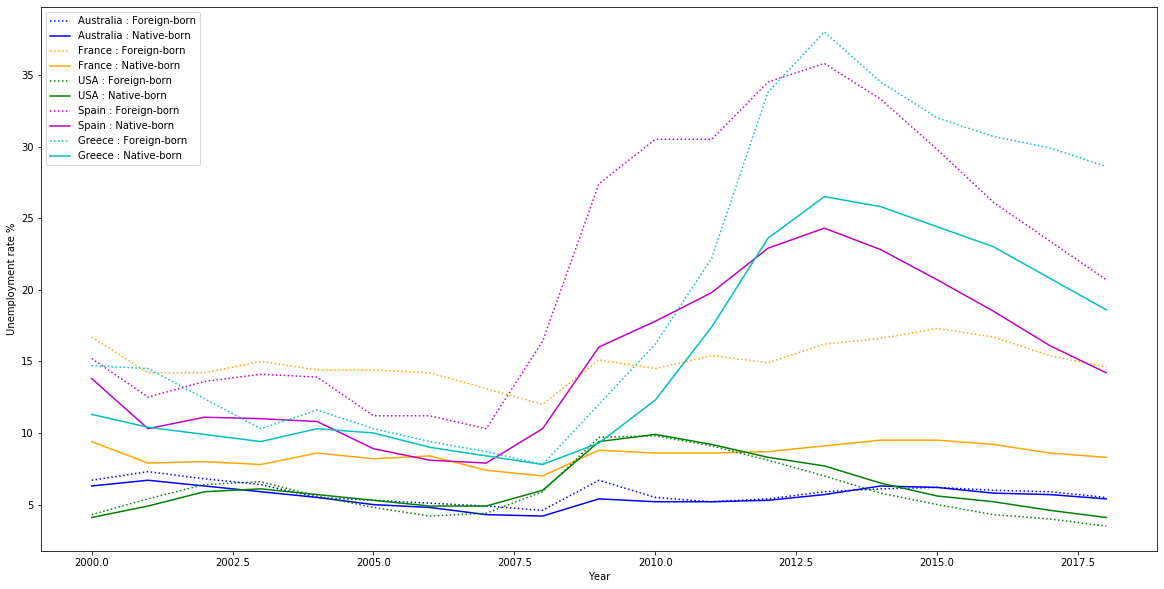

In [131]:
#Evolution of unemployment rate between 2000 and 2018
plt.figure(figsize=(20,10))

plt.plot(UnempRates.loc['Australia'].index.unique(), UnempRates.loc['Australia'][UnempRates.loc['Australia']['Place of birth']== 'Foreign-born'].Value, linestyle = ':', color = 'b' )
plt.plot(UnempRates.loc['Australia'].index.unique(), UnempRates.loc['Australia'][UnempRates.loc['Australia']['Place of birth']== 'Native-born'].Value, linestyle = '-', color = 'b' )

plt.plot(UnempRates.loc['France'].index.unique(), UnempRates.loc['France'][UnempRates.loc['France']['Place of birth']== 'Foreign-born'].Value, linestyle = ':', color = 'orange' )
plt.plot(UnempRates.loc['France'].index.unique(), UnempRates.loc['France'][UnempRates.loc['France']['Place of birth']== 'Native-born'].Value, linestyle = '-', color = 'orange' )

plt.plot(UnempRates.loc['United States'].index.unique(), UnempRates.loc['United States'][UnempRates.loc['United States']['Place of birth']== 'Foreign-born'].Value, linestyle = ':', color = 'g' )
plt.plot(UnempRates.loc['United States'].index.unique(), UnempRates.loc['United States'][UnempRates.loc['United States']['Place of birth']== 'Native-born'].Value, linestyle = '-', color = 'g' )

plt.plot(UnempRates.loc['Spain'].index.unique(), UnempRates.loc['Spain'][UnempRates.loc['Spain']['Place of birth']== 'Foreign-born'].Value, linestyle = ':', color = 'm' )
plt.plot(UnempRates.loc['Spain'].index.unique(), UnempRates.loc['Spain'][UnempRates.loc['Spain']['Place of birth']== 'Native-born'].Value, linestyle = '-', color = 'm' )

plt.plot(UnempRates.loc['Greece'].index.unique(), UnempRates.loc['Greece'][UnempRates.loc['Greece']['Place of birth']== 'Foreign-born'].Value, linestyle = ':', color = 'c' )
plt.plot(UnempRates.loc['Greece'].index.unique(), UnempRates.loc['Greece'][UnempRates.loc['Greece']['Place of birth']== 'Native-born'].Value, linestyle = '-', color = 'c' )


plt.legend(['Australia : Foreign-born', 'Australia : Native-born',
           'France : Foreign-born', 'France : Native-born',
           'USA : Foreign-born', 'USA : Native-born',
           'Spain : Foreign-born', 'Spain : Native-born',
           'Greece : Foreign-born', 'Greece : Native-born'])
plt.xlabel('Year')
plt.ylabel('Unemployment rate %')
plt.show()

As expected, Australia and the USA display a low unemployment rate. It doesn't really matter if you are a foreign born or a native born. That's certainly why immigration is strong in those kind of countries. Immigrants have hagh chances of getting a job there, and there seems to have very few discriminations between foreigners or natives. 

France on the contrary have a pretty high rate of unemployement. Morover, it seems to have an high discrimintation between natives and foreigners. Latters have an higher unemployment rate. So, immigrants are likely to have more difficulties of getting a job in France compared to Australia. Nevertheless, we have seen that inflows are pretty similar between France and Australia. Therefore, even though unemployment rate could be a good explanative variable, there are some others. We can think for exemple of healthcare or environment.  

Finally, Greece and Spain have a very high unemployment rate, especially for foreigners. We can see for bouth countries a peak that arises between 2007 and 2012. This period coincides exactly to the drop of inflows in theses countries. So, we can assume that there is a direct negative correlation between unemployment and inflows. 

### Government debt 

In [133]:
Gdebt.head()

,Country,Type,Frequency,Unit,Variable,Time period,Value,Flags
0,Australia,Stocks: Outstanding amounts,Annual,Million USD,Total central government debt,2000,46472.311,NaN
1,Australia,Stocks: Outstanding amounts,Annual,Million USD,Total central government debt,2001,35119.508,NaN
2,Australia,Stocks: Outstanding amounts,Annual,Million USD,Total central government debt,2002,37785.120,NaN
3,Australia,Stocks: Outstanding amounts,Annual,Million USD,Total central government debt,2003,41233.974,NaN
4,Australia,Stocks: Outstanding amounts,Annual,Million USD,Total central government debt,2004,40988.861,NaN


In [134]:
Gdebt.Type.unique()

array(['Stocks: Outstanding amounts', 'Flows: Net issues',
       'Flows: Gross issues'], dtype=object)

In [135]:
Gdebt.Variable.unique()

array(['Total central government debt',
       'Total central government debt % of GDP',
       'Total marketable debt % GDP', 'Marketable debt held by residents',
       'Marketable debt held by non-residents',
       'Marketable debt in foreign currency',
       'Weighted average yield of marketable debt',
       'Total non-marketable debt', 'Total non-marketable debt % GDP',
       'Non-marketable debt held by non-residents',
       'Total money market instruments',
       'Money market instruments % total marketable debt', 'Total bonds',
       'Government Bonds % total marketable debt',
       'Marketable debt held by non-residents (comparison table)',
       'Savings bonds', 'Other non-marketable debt', 'Treasury bills',
       'Commercial papers', 'Other money market instruments',
       'Total fixed rate income instruments', 'Index-linked bonds',
       'Variable-rate notes', 'Other bonds', 'Short-term bonds',
       'Medium-term bonds', 'Long-term bonds', 'GDP',
       'Total 

We will focus our analysis on the Total central government debt % of GDP 

In [139]:
DebtRates = Gdebt[Gdebt.Variable == 'Total central government debt % of GDP']
DebtRates = DebtRates[DebtRates.Type == 'Stocks: Outstanding amounts']
DebtRates = DebtRates.set_index([DebtRates.Country,DebtRates['Time period']])

In [145]:
DebtRates

Country                         Type Frequency  \
Country   Time period                                                     
Australia 2000         Australia  Stocks: Outstanding amounts    Annual   
          2001         Australia  Stocks: Outstanding amounts    Annual   
          2002         Australia  Stocks: Outstanding amounts    Annual   
          2003         Australia  Stocks: Outstanding amounts    Annual   
          2004         Australia  Stocks: Outstanding amounts    Annual   
...                          ...                          ...       ...   
Slovenia  2006          Slovenia  Stocks: Outstanding amounts    Annual   
          2007          Slovenia  Stocks: Outstanding amounts    Annual   
          2008          Slovenia  Stocks: Outstanding amounts    Annual   
          2009          Slovenia  Stocks: Outstanding amounts    Annual   
          2010          Slovenia  Stocks: Outstanding amounts    Annual   

                             Unit                                Variable  \
Country   Time period                                                       
Australia 2000         Percentage  Total central government debt % of GDP   
          2001         Percentage  Total central government debt % of GDP   
          2002         Percentage  Total central government debt % of GDP   
          2003         Percentage  Total central government debt % of GDP   
          2004         Percentage  Total central government debt % of GDP   
...                           ...                                     ...   
Slovenia  2006         Percentage  Total central government debt % of GDP   
          2007         Percentage  Total central government debt % of GDP   
          2008         Percentage  Total central government debt % of GDP   
          2009         Percentage  Total central government debt % of GDP   
          2010         Percentage  Total central government debt % of GDP   

                       Time period   Value  Flags  
Country   Time period                              
Australia 2000                2000  11.361    NaN  
          2001                2001   9.552    NaN  
          2002                2002   8.576    NaN  
          2003                2003   7.549    NaN  
          2004                2004   6.716    NaN  
...                            ...     ...    ...  
Slovenia  2006                2006  25.782    NaN  
          2007                2007  23.207    NaN  
          2008                2008  21.188    NaN  
          2009                2009  33.628    NaN  
          2010                2010  36.023    NaN  

[370 rows x 8 columns]

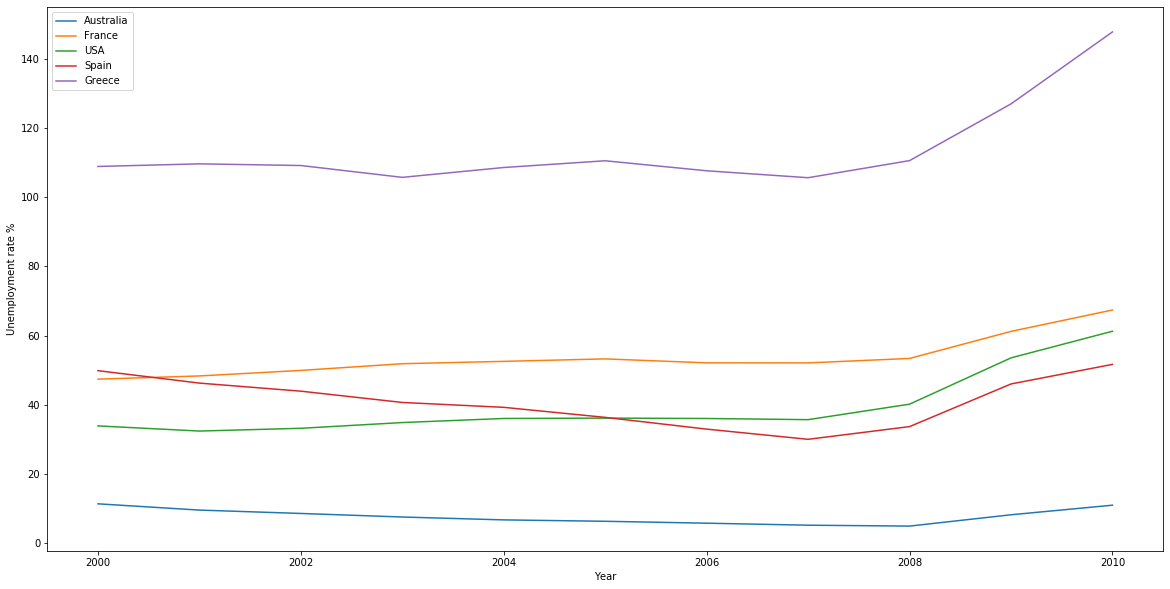

In [148]:
#Evolution of Governement debt rate (% of GDP) between 2000 and 2018
plt.figure(figsize=(20,10))

plt.plot(DebtRates.loc['Australia'].index, DebtRates.loc['Australia'].Value)
plt.plot(DebtRates.loc['France'].index, DebtRates.loc['France'].Value)
plt.plot(DebtRates.loc['United States'].index, DebtRates.loc['United States'].Value)
plt.plot(DebtRates.loc['Spain'].index, DebtRates.loc['Spain'].Value)
plt.plot(DebtRates.loc['Greece'].index, DebtRates.loc['Greece'].Value)

plt.legend(['Australia',
           'France',
           'USA',
           'Spain',
           'Greece'])
plt.xlabel('Year')
plt.ylabel('Unemployment rate %')
plt.show()